# DBSCAN

In [ ]:
from sklearn.neighbors import NearestNeighbors

def plot_kdist_graph(df, feats, n_neighbors=150):
  # K-distance graph to find out the right eps value
  ## For each data point, we calculate the average distance
  ## to its n_neighbors

  neigh = NearestNeighbors(n_neighbors=n_neighbors)
  neigh.fit(df[feats])
  distances, _ = neigh.kneighbors(df[feats])

  ## We sort the average distances of the points
  ## And plot this
  distances = np.sort(distances[:, -1])
  plt.ylabel("%d-NN Distance" % n_neighbors)
  plt.xlabel("Points sorted by distance")
  plt.plot(distances)
  plt.show()



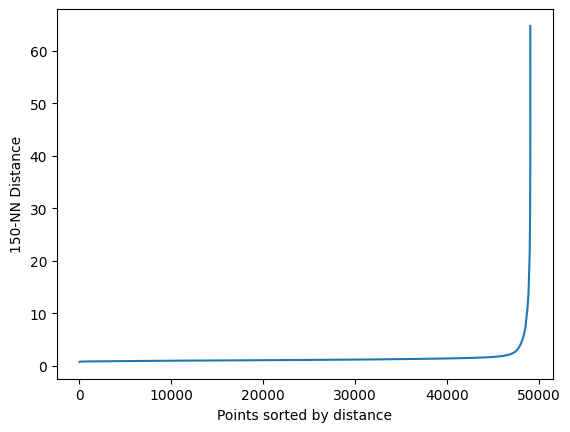

In [ ]:
plot_kdist_graph(preference_st_scl.sample(frac=0.4, random_state=1), preference_metrics)

In [ ]:
from sklearn.cluster import DBSCAN  # For the DBSCAN algorithm
import numpy as np                  # For numerical operations (e.g., np.unique)
from collections import Counter 

dbscan = DBSCAN(eps=1.1, min_samples=80, n_jobs=4)
dbscan_labels = dbscan.fit_predict(preference_st_scl.sample(frac=0.4, random_state=1))

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters  : %d" % dbscan_n_clusters)

## How many data points in each cluster?
print("Counter of cluster labels     :", Counter(dbscan_labels))
print("Percentage of noise rows      :", round(100*Counter(dbscan_labels)[-1]/preference_st_scl.sample(frac=0.4, random_state=1).shape[0],2))

Number of estimated clusters  : 9
Counter of cluster labels     : Counter({np.int64(2): 14693, np.int64(1): 9913, np.int64(0): 8571, np.int64(5): 6002, np.int64(-1): 5072, np.int64(4): 1786, np.int64(3): 1495, np.int64(6): 1065, np.int64(7): 482})
Percentage of noise rows      : 10.33


In [ ]:
from sklearn.cluster import DBSCAN  # For the DBSCAN algorithm
import numpy as np                  # For numerical operations (e.g., np.unique)
from collections import Counter 

dbscan = DBSCAN(eps=1.2, min_samples=80, n_jobs=4)
dbscan_labels = dbscan.fit_predict(preference_st_scl.sample(frac=0.4, random_state=1))

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters  : %d" % dbscan_n_clusters)

## How many data points in each cluster?
print("Counter of cluster labels     :", Counter(dbscan_labels))
print("Percentage of noise rows      :", round(100*Counter(dbscan_labels)[-1]/preference_st_scl.sample(frac=0.4, random_state=1).shape[0],2))

Number of estimated clusters  : 5
Counter of cluster labels     : Counter({np.int64(2): 14860, np.int64(3): 10387, np.int64(0): 10283, np.int64(1): 10068, np.int64(-1): 3481})
Percentage of noise rows      : 7.09


------

# UMAP

c:\Users\ritaf\Documentos\Estudos\NovaIMS\Mestrado_GIBI\DM_I\Project_Git\DMI\utils2.py:202: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  handles = [plt.scatter([], [], c=cmap(norm(i)), label=label) for i, label in enumerate(labels)]


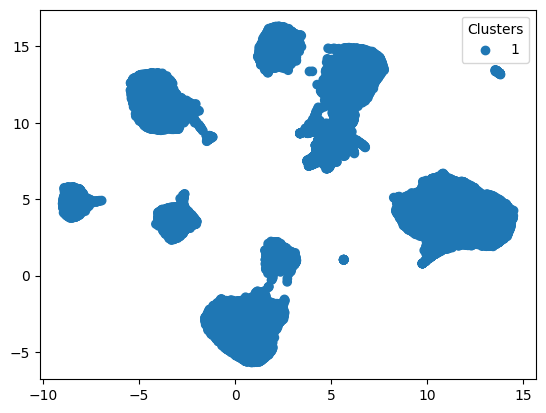

In [ ]:
umap_object = umap.UMAP(random_state=4)
umap_embedding = umap_object.fit_transform(preference)
preference['cont'] = 1
visualize_dimensionality_reduction(umap_embedding, preference['cont'])

c:\Users\ritaf\Documentos\Estudos\NovaIMS\Mestrado_GIBI\DM_I\Project_Git\DMI\utils2.py:202: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  handles = [plt.scatter([], [], c=cmap(norm(i)), label=label) for i, label in enumerate(labels)]


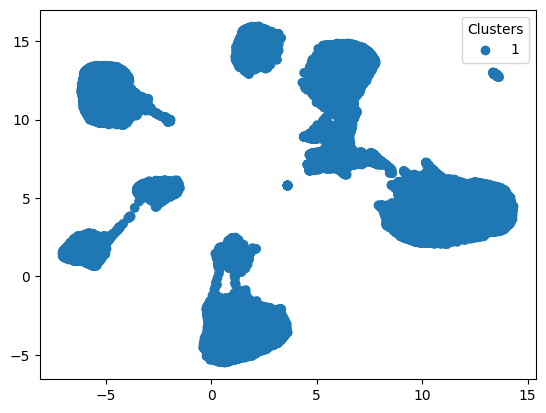

In [ ]:
umap_object = umap.UMAP(random_state=1)
umap_embedding = umap_object.fit_transform(preference)
preference['cont'] = 1
visualize_dimensionality_reduction(umap_embedding, preference['cont'])

----

In [ ]:
kmeans = KMeans(n_clusters = 4, init='k-means++', n_init=20,  random_state = 1).fit(sample_rb_scl)
sample_original['rb_kmeans4'] = kmeans.predict(sample_rb_scl)

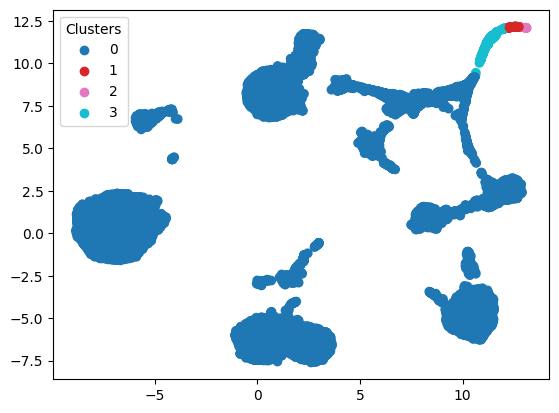

In [ ]:
visualize_dimensionality_reduction(umap_embedding_rb, sample_original['rb_kmeans4'])

In [ ]:
indexes = sample_original.index[sample_original['rb_kmeans4'] == 0].tolist()

In [ ]:
sample_copy = sample_original.copy()
sample_no_scl_copy = sample_no_scl.copy()
sample_st_scl_copy = sample_st_scl.copy()
sample_mm_scl_copy = sample_mm_scl.copy()
sample_rb_scl_copy = sample_rb_scl.copy()

In [ ]:
sample_copy0 = sample_copy.loc[indexes]
sample_no_scl_copy0 = sample_no_scl_copy.loc[indexes]
sample_st_scl_copy0 = sample_st_scl_copy.loc[indexes]
sample_mm_scl_copy0 = sample_mm_scl_copy.loc[indexes]
sample_rb_scl_copy0 = sample_rb_scl_copy.loc[indexes]

In [ ]:
umap_embedding_rb0 = umap_object.fit_transform(sample_rb_scl_copy0)

In [ ]:
groupby_mean(sample_copy0, 'rb_kmeans4', True)

# observations per cluster: [17793, 279, 5344, 743]


rb_kmeans4,0,1,2,3
beer,61.240000,79.400000,45.710000,65.290000
bottled_water,60.990000,59.520000,45.200000,58.580000
bread,26.440000,39.580000,29.770000,32.690000
meat,0.160000,25.440000,0.180000,9.270000
dairy,45.670000,59.180000,42.400000,50.400000
fresh_foods,54.340000,75.050000,76.260000,70.970000
frozen_foods,78.920000,107.380000,33.790000,89.490000
fruit_beverages,42.240000,62.560000,64.080000,58.070000
pastry,30.620000,53.480000,114.190000,50.310000
sodas,32.560000,57.490000,33.440000,41.610000


In [ ]:
kmeans = KMeans(n_clusters = 5, init='k-means++', n_init=20,  random_state = 1).fit(sample_rb_scl_copy0)
sample_copy0['rb_kmeans5'] = kmeans.predict(sample_rb_scl_copy0)

In [ ]:
groupby_mean(sample_copy0, 'rb_kmeans5', True)

# observations per cluster: [13810, 243, 5339, 4052, 715]


rb_kmeans5,0,1,2,3,4
beer,66.120000,78.140000,45.720000,44.890000,65.180000
bottled_water,65.800000,59.630000,45.190000,44.720000,57.680000
bread,29.970000,40.300000,29.650000,14.760000,32.270000
meat,0.180000,26.560000,0.180000,0.180000,10.090000
dairy,34.680000,59.850000,42.350000,83.170000,51.130000
fresh_foods,60.770000,74.690000,76.290000,32.370000,72.940000
frozen_foods,92.880000,108.370000,33.760000,31.720000,88.830000
fruit_beverages,48.550000,61.490000,64.160000,20.700000,59.720000
pastry,30.620000,53.720000,114.270000,30.660000,51.760000
sodas,32.570000,58.960000,33.480000,32.610000,42.170000


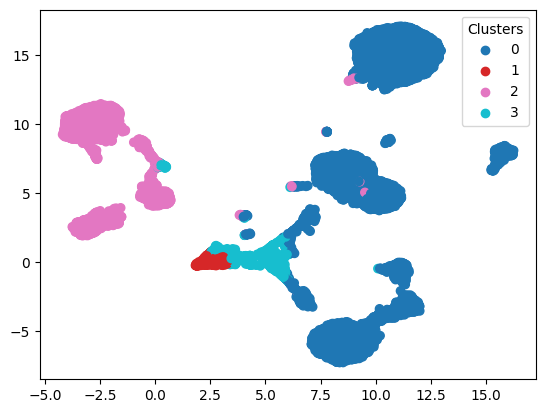

In [ ]:
visualize_dimensionality_reduction(umap_embedding_rb0, sample_copy0['rb_kmeans4'])

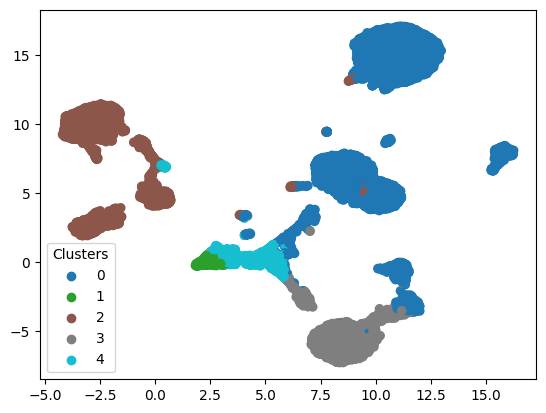

In [ ]:
visualize_dimensionality_reduction(umap_embedding_rb0, sample_copy0['rb_kmeans5'])